# Data Understanding

1) Pengumpulan Data 

In [1]:
# Import Libraries

# Mengimpor library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Dataset

# Mengimpor dataset dari penyimpanan internal
data_set = 'bahan/final bahan/mergeFile-en new.csv'
df = pd.read_csv(data_set, encoding='utf-8', sep=';')

2) Eksplorasi Data 

In [3]:
# Kuantitas Data
print("Jumlah Pekerjaan Tersedia:", len(df))

Jumlah Pekerjaan Tersedia: 2340


Cek Struktur Data

In [4]:
# Format Data
# Memeriksa format data, apakah berupa file teks, CSV, JSON, atau format lainnya.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   job_title       2340 non-null   object
 1   company         2304 non-null   object
 2   descriptions    2233 non-null   object
 3   location        2340 non-null   object
 4   subcategory     2340 non-null   object
 5   type            2340 non-null   object
 6   salary          550 non-null    object
 7   date_ingestion  2340 non-null   object
dtypes: object(8)
memory usage: 146.4+ KB


In [5]:
df.head()

,job_title,company,descriptions,location,subcategory,type,salary,date_ingestion
0,Microsoft Dynamics / Power Apps Developer,PT Xumei Food Tech Indonesia,"Bachelor's degree in computer science, enginee...","West Jakarta, Jakarta",Developer/Programmer,full time,NaN,16/01/2024
1,Frontend Internship,PT. Radha Mustika Chakra,Develop new user interface features that meet ...,Jakarta,Engineering - Software,Casual/Vacation,NaN,16/01/2024
2,Fullstack Engineer,PT Teknologi Pamadya Analytical,Deeply engaged in the full development lifecyc...,"Tangerang, Banten",Developer/Programmer,full time,NaN,16/01/2024
3,Web Developer,PT Supra Boga Lestari Tbk,Minimum working experience 2 years; Passion fo...,Jakarta,Engineering - Software,full time,NaN,16/01/2024
4,Senior Python IT Staff,PT. Sinar Mas Insurance,"Male/Female, max age 28 years; Bachelor's degr...","Central Jakarta, Jakarta",Engineering - Software,full time,NaN,16/01/2024


In [6]:
df.describe()

,job_title,company,descriptions,location,subcategory,type,salary,date_ingestion
count,2340,2304,2233,2340,2340,2340,550,2340
unique,317,251,309,61,21,5,51,4
top,Systems Analyst,OTO Group,What's your expected monthly basic salary? How...,South Jakarta,Business/System Analyst,full time,"IDR 5,000,000 – IDR 6,000,000 per month",19/06/2024
freq,305,127,79,725,805,1993,67,1440


3) Verifikasi Kualitas Data

In [7]:
# Periksa Missing Value
df.isnull().sum()

job_title            0
company             36
descriptions       107
location             0
subcategory          0
type                 0
salary            1790
date_ingestion       0
dtype: int64

In [8]:
# Mengganti nilai NaN dengan string kosong
df['descriptions'] = df['descriptions'].fillna('')

# Periksa Distribusi Panjang Teks
df['descriptions'].apply(len).describe()

count    2340.000000
mean     1041.725214
std       761.521599
min         0.000000
25%       326.000000
50%      1050.000000
75%      1467.000000
max      3668.000000
Name: descriptions, dtype: float64

In [9]:
df['descriptions'].nunique()

310

In [10]:
duplicates = df[df.duplicated()]
print(duplicates)

                                              job_title  \
292                                     Systems Analyst   
293                                     Systems Analyst   
294                                  IT Systems Analyst   
295                                 Systems Development   
296                      IT System Support (JS - IT SS)   
...                                                 ...   
2335                                     SYSTEM SUPPORT   
2336                             Senior Systems Analyst   
2337                          Inspur IT Server Engineer   
2338  IT System Administration and General Affairs -...   
2339  Information Security and System Risk Controlle...   

                                      company  \
292   PT Mulia Cemerlang Abadi Multi Industry   
293                          KSP Veranda Dana   
294               PT GLOBAL LOYALTY INDONESIA   
295             PT Sriboga Marugame Indonesia   
296                                 OTO Group 

4) Visualisasi Data 

Visualisasi Label 

In [11]:
# Tampilkan semua label
labels = df['subcategory'].unique()
print("Labels in dataset:", labels)

Labels in dataset: ['Developer/Programmer' 'Engineering - Software'
 'Database Development & Administration' 'Testing & Quality Assurance'
 'Program & Project Management' 'Web Development & Production'
 'Network & System Administration' 'Help Desk & IT Support'
 'Business/System Analyst' 'Team Leader' 'Sales - Pre & Post' 'Management'
 'Product Management & Development' 'Consultants' 'Other' 'Architects'
 'Security' 'Engineering - Network' 'Technical Writing'
 'Telecommunications' 'Engineering - Hardware']


In [12]:
# Perbandingan nilai distribusi value subcategory
print('Perbandingan distribusi value subcategory:')
print(df['subcategory'].value_counts())

Perbandingan distribusi value subcategory:
Business/System Analyst                  805
Network & System Administration          538
Developer/Programmer                     198
Security                                 162
Program & Project Management              98
Database Development & Administration     95
Help Desk & IT Support                    83
Engineering - Network                     77
Management                                63
Testing & Quality Assurance               57
Engineering - Software                    49
Product Management & Development          38
Engineering - Hardware                    20
Team Leader                               20
Sales - Pre & Post                        15
Consultants                               11
Web Development & Production               5
Architects                                 2
Other                                      2
Technical Writing                          1
Telecommunications                         1
Name: subcat

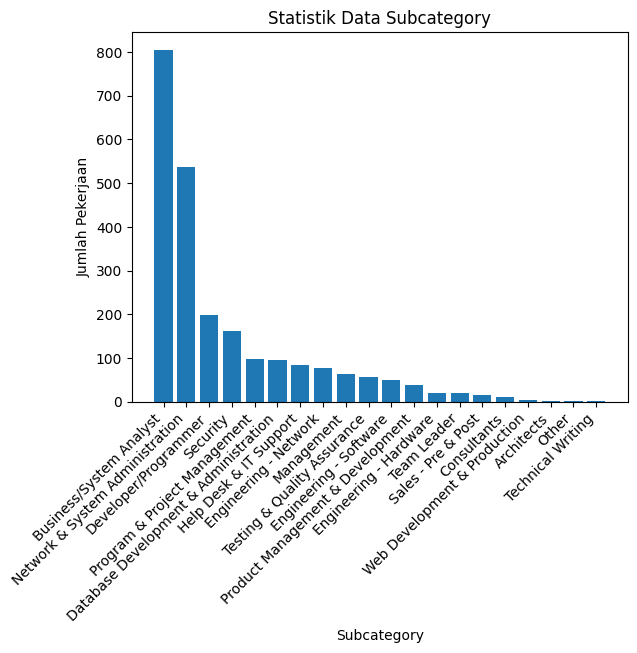

In [13]:
# Statistik Dasar
# Statistik deskriptif untuk kolom Bidang

unique_counts = df['subcategory'].value_counts().reset_index()
unique_counts.columns = ['Teks', 'Jumlah']
plt.bar(unique_counts['Teks'][:20], unique_counts['Jumlah'][:20])
plt.xticks(rotation=45, ha='right')
plt.title('Statistik Label Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Jumlah Pekerjaan')
plt.show()

Visualisasi Teks

[('and', 17075), ('to', 9100), ('in', 6952), ('you', 6472), ('the', 6131), ('of', 5953), ('a', 4520), ('experience', 3744), ('with', 3715), ('for', 3606)]


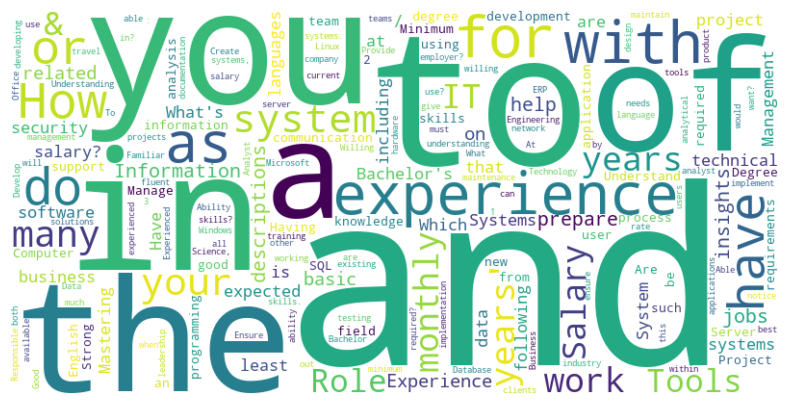

In [14]:
# Mengidentifikasi kata-kata yang paling sering muncul, kata-kata unik, dan pola penggunaan kata.
# Menggunakan visualisasi sederhana seperti histogram atau word cloud untuk memahami distribusi kata-kata dan frekuensi kemunculannya.

from collections import Counter
from wordcloud import WordCloud

df['descriptions'] = df['descriptions'].fillna('').astype(str)

# Tokenisasi dan hitung frekuensi kata
all_words = ' '.join(df['descriptions']).split()
word_freq = Counter(all_words)

# Kata-kata yang paling sering muncul
common_words = word_freq.most_common(10)
print(common_words)

# Visualisasi dengan word cloud
# memahami distribusi kata-kata dan frekuensi kemunculannya.
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

5) Exploratory Data Analysis (EDA)

Top 10 unigrams: [('and', 17478), ('to', 9520), ('in', 7614), ('you', 6529), ('the', 6247), ('of', 5978), ('experience', 5226), ('with', 3977), ('for', 3611), ('have', 3531)]
Top 10 bi-grams: [('do you', 2692), ('you have', 2073), ('years experience', 1945), ('how many', 1827), ('many years', 1827), ('experience do', 1792), ('are you', 1541), ('experience in', 1512), ('have as', 1456), ('tools to', 1382)]
Top 10 tri-grams: [('do you have', 2052), ('how many years', 1827), ('experience do you', 1792), ('many years experience', 1602), ('years experience do', 1602), ('you have as', 1456), ('descriptions salary insights', 1380), ('help you prepare', 1380), ('insights tools to', 1380), ('prepare for jobs', 1380)]


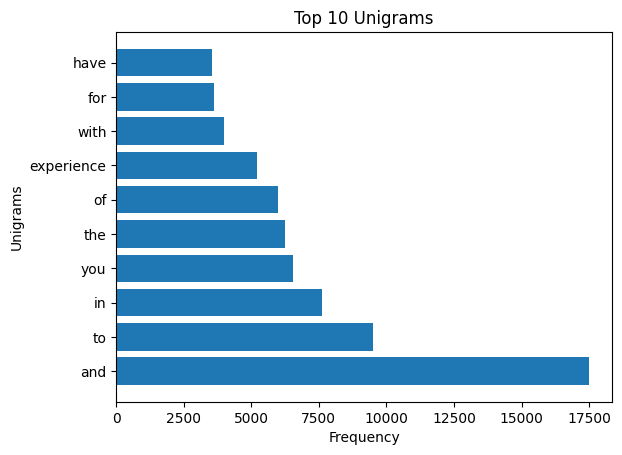

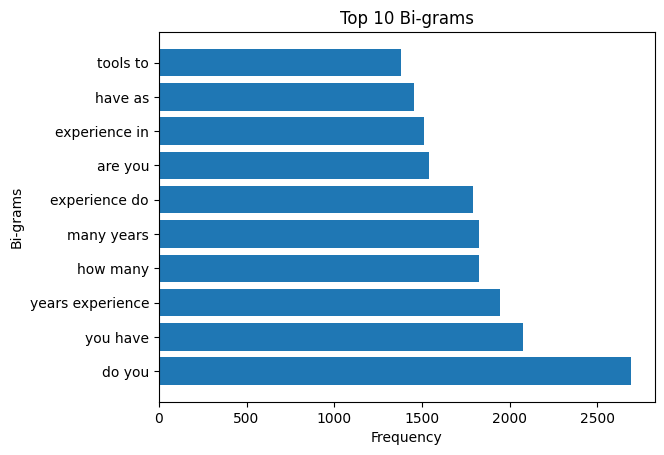

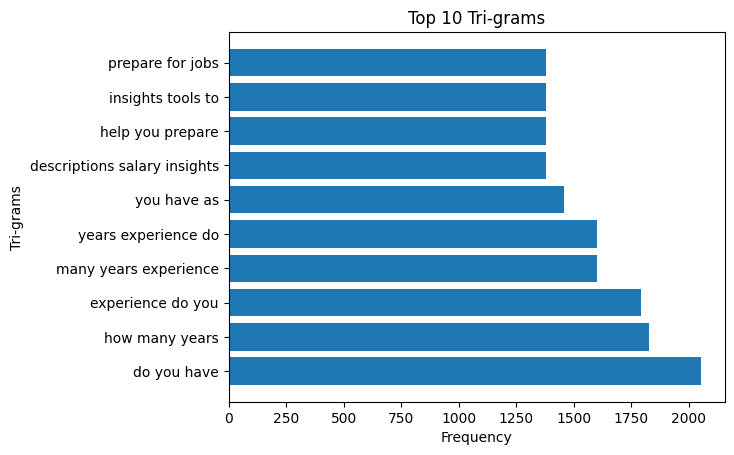

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Fungsi untuk membuat n-gram
def generate_ngrams(text, n):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform(text)
    ngram_freq = zip(vectorizer.get_feature_names_out(), ngrams.sum(axis=0).tolist()[0])
    return sorted(ngram_freq, key=lambda x: x[1], reverse=True)

# Unigram
unigrams = generate_ngrams(df['descriptions'], 1)
print('Top 10 unigrams:', unigrams[:10])

# Bi-gram
bigrams = generate_ngrams(df['descriptions'], 2)
print('Top 10 bi-grams:', bigrams[:10])

# Tri-gram
trigrams = generate_ngrams(df['descriptions'], 3)
print('Top 10 tri-grams:', trigrams[:10])

# Visualisasi unigram
unigram_words, unigram_freqs = zip(*unigrams[:10])
plt.barh(unigram_words, unigram_freqs)
plt.xlabel('Frequency')
plt.ylabel('Unigrams')
plt.title('Top 10 Unigrams')
plt.show()

# Visualisasi bi-gram
bigram_words, bigram_freqs = zip(*bigrams[:10])
plt.barh(bigram_words, bigram_freqs)
plt.xlabel('Frequency')
plt.ylabel('Bi-grams')
plt.title('Top 10 Bi-grams')
plt.show()

# Visualisasi tri-gram
tri_gram_words, tri_gram_freqs = zip(*trigrams[:10])
plt.barh(tri_gram_words, tri_gram_freqs)
plt.xlabel('Frequency')
plt.ylabel('Tri-grams')
plt.title('Top 10 Tri-grams')
plt.show()


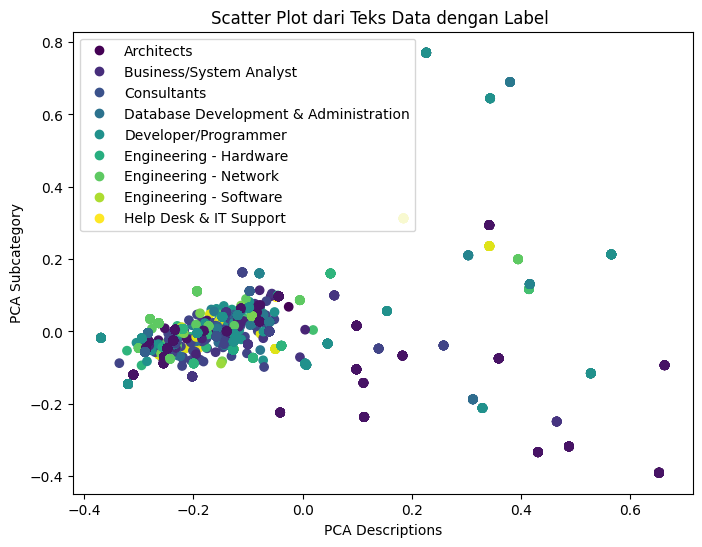

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Mengubah teks menjadi fitur numerik menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['descriptions'])

# Mengurangi dimensi menggunakan PCA agar dapat divisualisasikan (2 komponen)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Encoding label ke dalam bentuk numerik
le = LabelEncoder()
y = le.fit_transform(df['subcategory'])

# Membuat scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')

# Mendapatkan legend elements
handles, _ = scatter.legend_elements()

# Menambahkan legend dengan label yang benar
plt.legend(handles=list(handles), labels=list(le.classes_))
plt.title('Scatter Plot dari Teks Data dengan Label')
plt.xlabel('PCA Descriptions')
plt.ylabel('PCA Subcategory')
plt.show()
